<a href="https://colab.research.google.com/github/adikal25/NBME/blob/main/Score_Clinical_Patient_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Downloading dataset from kaggle
*Score Clinical Patient Notes*

In [1]:
 ! pip install -q kaggle

In [2]:
 mkdir ~/.kaggle

In [3]:
cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c nbme-score-clinical-patient-notes

 51% 5.00M/9.83M [00:00<00:00, 35.5MB/s]
100% 9.83M/9.83M [00:00<00:00, 53.6MB/s]


#Data Preprocessing

In [6]:
!pip install patool


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 3.4 MB/s eta 0:00:00


In [7]:
import patoolib
patoolib.extract_archive('/content/nbme-score-clinical-patient-notes.zip')

INFO patool: Extracting /content/nbme-score-clinical-patient-notes.zip ...
INFO:patool:Extracting /content/nbme-score-clinical-patient-notes.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_p2bj64vc -- /content/nbme-score-clinical-patient-notes.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_p2bj64vc -- /content/nbme-score-clinical-patient-notes.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/nbme-score-clinical-patient-notes.zip extracted to `nbme-score-clinical-patient-notes' (multiple files in root).
INFO:patool:... /content/nbme-score-clinical-patient-notes.zip extracted to `nbme-score-clinical-patient-notes' (multiple files in root).


'nbme-score-clinical-patient-notes'

In [8]:
import os

# Specify the path to the zip file
zip_file_path = '/content/nbme-score-clinical-patient-notes.zip'

# Check if the file exists
if os.path.exists(zip_file_path):
    # Delete the file
    os.remove(zip_file_path)
    print(f"{zip_file_path} deleted successfully.")
else:
    print(f"{zip_file_path} does not exist.")


/content/nbme-score-clinical-patient-notes.zip deleted successfully.


In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import  LabelEncoder
from tqdm.auto import tqdm
import random
import ast
import os
import plotly.express as px
import plotly.offline as pyo

from tqdm.auto import tqdm

In [10]:
DIR = '/content/nbme-score-clinical-patient-notes'

In [11]:
features = pd.read_csv(DIR+"/features.csv")
patient_notes = pd.read_csv(DIR+"/patient_notes.csv")
test = pd.read_csv(DIR+"/test.csv")
train= pd.read_csv(DIR+"/train.csv")

In [12]:
features.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [13]:
patient_notes.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...


In [14]:

px.histogram(patient_notes, x="case_num", color="case_num")

In [15]:
train.head()

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [16]:
test.head()

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


In [17]:
train= train.merge(patient_notes,on=['case_num','pn_num']).merge(features,on=['case_num','feature_num'])

In [18]:
train.head()

,id,case_num,pn_num,feature_num,annotation,location,pn_history,feature_text
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],HPI: 17yo M presents with palpitations. Patien...,Family-history-of-MI-OR-Family-history-of-myoc...
1,00041_000,0,41,0,[],[],17 Y/O M CAME TO THE CLINIC C/O HEART POUNDING...,Family-history-of-MI-OR-Family-history-of-myoc...
2,00046_000,0,46,0,['father: heart attack'],['824 844'],Mr. Cleveland is a 17yo M who was consented by...,Family-history-of-MI-OR-Family-history-of-myoc...
3,00082_000,0,82,0,['Father MI'],['622 631'],17 yo M w/ no cardiac or arrhythmia PMH presen...,Family-history-of-MI-OR-Family-history-of-myoc...
4,00100_000,0,100,0,['Dad-MI'],['735 741'],HPI: Dillon Cleveland is an otherwise healthy ...,Family-history-of-MI-OR-Family-history-of-myoc...


In [19]:

px.histogram(train, x="case_num", color="case_num")

In [20]:
test = test.merge(patient_notes,on=['case_num','pn_num']).merge(features,on=['case_num','feature_num'])

In [21]:
test.head()

,id,case_num,pn_num,feature_num,pn_history,feature_text
0,00016_000,0,16,0,HPI: 17yo M presents with palpitations. Patien...,Family-history-of-MI-OR-Family-history-of-myoc...
1,00016_001,0,16,1,HPI: 17yo M presents with palpitations. Patien...,Family-history-of-thyroid-disorder
2,00016_002,0,16,2,HPI: 17yo M presents with palpitations. Patien...,Chest-pressure
3,00016_003,0,16,3,HPI: 17yo M presents with palpitations. Patien...,Intermittent-symptoms
4,00016_004,0,16,4,HPI: 17yo M presents with palpitations. Patien...,Lightheaded


  #TOKENIZER


In [22]:
!pip install transformers

In [23]:
import os
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoConfig,AutoModel
import json
import torch
import torch.nn.functional as F
from ast import literal_eval
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch import optim
from sklearn.model_selection import train_test_split
import torch.nn as nn

In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")  # Or "google/bert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased")  # Or "google/bert-base-uncased"


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:

# Create the "model" folder inside "mydir" (if it doesn't exist)
model_dir = os.path.join(DIR, "model")
os.makedirs(model_dir, exist_ok=True)


In [26]:
model.save_pretrained(model_dir)
tokenizer.save_pretrained(model_dir)

('/content/nbme-score-clinical-patient-notes/model/tokenizer_config.json',
 '/content/nbme-score-clinical-patient-notes/model/special_tokens_map.json',
 '/content/nbme-score-clinical-patient-notes/model/vocab.txt',
 '/content/nbme-score-clinical-patient-notes/model/added_tokens.json',
 '/content/nbme-score-clinical-patient-notes/model/tokenizer.json')

In [27]:
hyperparameters = {
    'max_length': 512,
    'lr': 3e-5,
    'val_size': 0.2,
    'seed': 999,
    'batch_size': 8,
    'epochs': 3,
    'model': '/content/nbme-score-clinical-patient-notes/model',
    'dropout':0.1
}

In [28]:
EMPTY =  -1
CLASSES = [EMPTY,]+features.feature_num.unique().tolist()
print("Unique classes: ", CLASSES)
print("\nNumber of unique classes: ", len(CLASSES))

Unique classes:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 700, 701, 702, 703, 704, 705, 706, 707, 708, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916]

Number of unique classes:  144


In [29]:
DATA_EXISTS = os.path.exists(DIR+'model')

In [30]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.7 MB/s eta 0:00:00


In [31]:
import dill
from sklearn.preprocessing import LabelEncoder

if DATA_EXISTS:
    label_encoder = dill.load(open(DIR + "model/label_encoder.dill", 'rb'))
else:
    # label_encoder
    label_encoder = LabelEncoder()
    # Encode labels
    label_encoder.fit(CLASSES)
    dill.dump(label_encoder, open('label_encoder.dill', 'wb'))

train['TARGET'] = label_encoder.transform(train['feature_num'])
test['TARGET'] = label_encoder.transform(test['feature_num'])
N_CLASSES = len(label_encoder.classes_)
EMPTY_IDX = label_encoder.transform([EMPTY, ])[0]
print(f"Empty label: {EMPTY_IDX}")

Empty label: 0


In [32]:
def decode_location(locations):
    """This function transform the location features from a string representation of a list to a list of tuples"""
    for x in ["[","]","'"]:
        locations = locations.replace(x,'')
    locations = locations.replace(',',';')
    locations = locations.split(";")
    res = []
    for location in locations:
        if location:
            x,y = location.split()
            res.append((int(x),int(y)))
    return sorted(res,key=lambda x:x[0])

def decode_metrics(locations):
    res = []
    for location in ast.literal_eval(locations):
        if location:
            for loc in location.split(';'):
                x,y = loc.split()
                res.append(np.arange(int(x), int(y)))
    res = np.array(res, dtype = object)
    try:
        res = np.concatenate(res)
        res = np.array(list(set(res)))
    except:
        pass
    return res

def decode_position(pos):
    """This function transforms the predicted position to the format required in the Kaggle submission """
    return ";".join([" ".join(np.array(p).astype(str)) for p in pos])


def translate(preds,targets_to_row_ids,offsets):
    """This function takes the predicitons and for each target feature in the test dataset
    checks whether that feature is predicted somewhere in the sequence.
    If a target feature is detected in the prediction vector, it returns the characters positions of the feature."""
    all_ids = []
    all_pos = []

    for k in range(len(preds)):
        offset = offsets[k]
        pred = preds[k]

        targets_to_ids = targets_to_row_ids[k]
        prediction = {targets_to_ids[t]:[] for t in targets_to_ids}
        i = 0
        while i<hyperparameters['max_length']:
            label = pred[i]

            if label == EMPTY_IDX:
                i += 1
                continue
            if label in targets_to_ids:
                key = targets_to_ids[label]
                start = offset[i][0]
                while i<hyperparameters['max_length']:
                    if pred[i] != label:
                        break
                    else:
                        end = max(offset[i])
                    i += 1
                if  end == 0:
                    break
                prediction[key].append((start,end))
            else:
                i+=1
        for key in prediction:
            all_ids.append(key)
            all_pos.append(decode_position(prediction[key]))
    df = pd.DataFrame({
        "id":all_ids,
        "location": all_pos
    })
    return df

In [33]:
DATA_PATH = '/content/nbme-score-clinical-patient-notes/model'

In [34]:
if not DATA_EXISTS:
    sequences, labels, masks,  offsets_list  = [], [], [], []
    row_ids = []
    targets = []

    for group in tqdm(train.groupby('pn_num')): #the training set is grouped by the patient number. There are 1000 unique patient numbers
        group_df = group[1] #to extract the grouped df corresponding to each pn_num, group[0] instead returns the pn_num
        pn_history  = group_df.iloc[0].pn_history
        tokens = tokenizer.encode_plus(pn_history, max_length=hyperparameters['max_length'], padding='max_length', truncation=True, return_offsets_mapping=True)
        sequence = tokens['input_ids'] #token embedding, each token is mapped to a index that represent a word or a subword in the Bert vocabulary
        attention_mask = tokens['attention_mask'] #0 is a padded value

        targets.append([])
        row_ids.append([])

        label = np.array([EMPTY_IDX for _ in range(hyperparameters['max_length'])])
        offsets = tokens['offset_mapping'] #vector that retuns the starting character position and the end character position of each token

        label_empty = True
        for index, row in group_df.iterrows():
            target = row.TARGET #this is the target label representing a unique feature that has to be detected in the patient history
            targets[-1].append(target)
            row_ids[-1].append(row.id)

            for i, (w_start, w_end) in enumerate(offsets):
                for start, end in decode_location(row.location):
                    if w_start < w_end and (w_start >= start) and (end >= w_end):
                        #if the position of a token in the offset mapping vector is included between the index positions indicated by the location feature
                        #then assign the target label of the row that is considered to the label vector entry that matches the index position of that token
                        label[i] = target
                        label_empty = False
                    if w_start >= w_end:
                        break
        if not label_empty:
            sequences.append(sequence)
            masks.append(attention_mask)
            labels.append(label)
            offsets_list.append(offsets)

    sequences = np.array(sequences).astype(np.int32) #transform the list into an array
    masks = np.array(masks).astype(np.uint8)
    labels = F.one_hot(torch.Tensor(np.array(labels)).long(), num_classes=N_CLASSES) #one hot encoding of labels
    labels = np.array(labels) #to transform the tensor back to an array
    targets_to_row_ids = [dict(zip(a,b)) for a,b in zip(targets,row_ids)]
    np.save(open("masks.npy",'wb'), masks)
    np.save(open("sequences.npy",'wb'), sequences)
    np.save(open("labels.npy",'wb'), labels)
    np.save(open("targets_to_row_ids.npy", 'wb'), targets_to_row_ids)
    np.save(open("offsets_list", 'wb'), offsets_list)
else:
    masks = np.load(open(DATA_PATH+"/masks.npy",'rb'))
    sequences = np.load(open(DATA_PATH+"/sequences.npy",'rb'))
    labels = np.load(open(DATA_PATH+"/labels.npy",'rb'))
    targets_to_row_ids = np.load(open(DATA_PATH+"/targets_to_row_ids.npy", 'rb'),allow_pickle=True)
    offsets_list = np.load(open(DATA_PATH+'/offsets_list', 'rb'))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [35]:
import pandas as pd
train_bert = pd.DataFrame({'sequence': sequences.tolist(),'mask': masks.tolist(), 'label': labels.tolist()})

train_bert, val_bert = train_test_split(train_bert, test_size=hyperparameters['val_size'], random_state=hyperparameters['seed'])
targets_to_row_ids_train, targets_to_row_ids_val = np.take(targets_to_row_ids, train_bert.index), np.take(targets_to_row_ids, val_bert.index)
offsets_train, offsets_val =np.take(np.array(offsets_list), train_bert.index, axis = 0), np.take(np.array(offsets_list), val_bert.index, axis= 0)

In [36]:
class CustomDataset(Dataset):

    def __init__(self, data, tokenizer, hyperparameters):
        self.data = data
        self.tokenizer = tokenizer
        self.hyperparameters = hyperparameters

    def __len__(self):
        '''Method that returns the length of the dataset'''
        return len(self.data)

    def __getitem__(self, index):
        '''Method that processes and returns 1 datapoint at a time.'''
        sequence = self.data.iloc[index]["sequence"]
        mask = self.data.iloc[index]['mask']
        label = self.data.iloc[index]['label']
        return np.array(sequence), np.array(mask), np.array(label)

In [37]:
class CustomModel(nn.Module):
    def __init__(self, hyperparameters):
        super().__init__()
        self.bert = AutoModel.from_pretrained(hyperparameters['model']) # BERT model
        self.dropout = nn.Dropout(p=hyperparameters['dropout'])
        self.config =  AutoConfig.from_pretrained(hyperparameters['model'])
        self.fc1 = nn.Linear(768, N_CLASSES)

    def summary(self):
        return print()

    def forward(self, input_ids, attention):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention)
        logits = self.fc1(self.dropout(outputs[0]))
        return logits

In [38]:
df_old = pd.DataFrame([['','','', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns = ['batch_size', 'lr', 'epochs', 'train_acc', 'val_acc', 'train_loss', 'val_loss', 'train_prec', 'val_prec', 'train_rec', 'val_rec', 'train_f1', 'val_f1'])

In [39]:
import numpy as np
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(0)

In [40]:
model_path = hyperparameters['model']

# Define the optimizer
optimizer = optim.AdamW(model.parameters(), lr=hyperparameters['lr'])

# Assuming train_bert and val_bert are already defined
training_data = CustomDataset(train_bert, tokenizer, hyperparameters)
train_dataloader = DataLoader(training_data, batch_size=hyperparameters['batch_size'], shuffle=True, worker_init_fn=seed_worker,
generator=g)
testing_data = CustomDataset(val_bert, tokenizer, hyperparameters)
test_dataloader = DataLoader(testing_data, batch_size=hyperparameters['batch_size'], shuffle=True, worker_init_fn=seed_worker,
generator=g)

# Device, Model, Loss Function, Optimizer Setup
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define the model
model = CustomModel(hyperparameters).to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer with the learning rate
optimizer = optim.AdamW(model.parameters(), lr=hyperparameters['lr'])

In [41]:
for batch_idx, (inputs, mask, labels) in enumerate(train_dataloader):
    # Print the shapes of inputs, mask, and labels for the current batch
    print(f"Batch {batch_idx}: Inputs shape: {inputs.shape}, Mask shape: {mask.shape}, Labels shape: {labels.shape}")




Batch 0: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 1: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 2: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 3: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 4: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 5: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 6: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 7: Inputs shape: torch.Size([8, 512]), Mask shape: torch.Size([8, 512]), Labels shape: torch.Size([8, 512, 144])
Batch 8: Inputs shape: torch.Size([8, 512]), Mas

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define number of epochs
num_epochs = 5
train_losses = []
val_losses = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to train mode
    total_train_loss = 0.0

    for batch_idx, batch in enumerate(tqdm(train_dataloader)):
        optimizer.zero_grad()  # Zero the gradients

        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        # Forward pass
        logits = model(input_ids, attention_mask)

        # Compute the loss
        loss = criterion(torch.permute(logits, (0, 2, 1)), torch.argmax(labels, dim=2))

        # Backward pass
        loss.backward()

        # Update the parameters
        optimizer.step()

        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Avg Train Loss: {avg_train_loss:.4f}")

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    correct_val_predictions = 0
    total_val_predictions = 0
    val_true_labels = []
    val_pred_labels = []

    for batch_idx, batch in enumerate(tqdm(test_dataloader)):
        with torch.no_grad():  # No gradient computation during validation
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            # Forward pass
            logits = model(input_ids, attention_mask)

            # Compute the loss
            loss = criterion(torch.permute(logits, (0, 2, 1)), torch.argmax(labels, dim=2))

            total_val_loss += loss.item()

            # Compute accuracy
            predicted_labels = torch.argmax(logits, dim=2)
            correct_val_predictions += torch.sum(predicted_labels == torch.argmax(labels, dim=2)).item()
            total_val_predictions += labels.size(0) * labels.size(1)

            # Store true and predicted labels for computing precision, recall, and F1 score
            val_true_labels.extend(torch.argmax(labels, dim=2).flatten().tolist())
            val_pred_labels.extend(predicted_labels.flatten().tolist())

    avg_val_loss = total_val_loss / len(test_dataloader)
    val_losses.append(avg_val_loss)
    val_accuracy = correct_val_predictions / total_val_predictions
    val_accuracies.append(val_accuracy)

    # Calculate precision, recall, and F1 score
    val_precision = precision_score(val_true_labels, val_pred_labels, average='weighted')
    val_precisions.append(val_precision)
    val_recall = recall_score(val_true_labels, val_pred_labels, average='weighted')
    val_recalls.append(val_recall)
    val_f1 = f1_score(val_true_labels, val_pred_labels, average='weighted')
    val_f1_scores.append(val_f1)

    print(f"Epoch [{epoch+1}/{num_epochs}], Avg Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, Val Precision: {val_precision:.4f}, Val Recall: {val_recall:.4f}, Val F1 Score: {val_f1:.4f}")


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/5], Avg Train Loss: 0.1648


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Epoch [1/5], Avg Val Loss: 0.1873, Val Accuracy: 0.9565, Val Precision: 0.9586, Val Recall: 0.9565, Val F1 Score: 0.9543


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [2/5], Avg Train Loss: 0.1231


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [2/5], Avg Val Loss: 0.1603, Val Accuracy: 0.9640, Val Precision: 0.9620, Val Recall: 0.9640, Val F1 Score: 0.9611


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [3/5], Avg Train Loss: 0.0927


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Epoch [3/5], Avg Val Loss: 0.1473, Val Accuracy: 0.9666, Val Precision: 0.9663, Val Recall: 0.9666, Val F1 Score: 0.9654


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [4/5], Avg Train Loss: 0.0720


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [4/5], Avg Val Loss: 0.1527, Val Accuracy: 0.9681, Val Precision: 0.9664, Val Recall: 0.9681, Val F1 Score: 0.9657


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [5/5], Avg Train Loss: 0.0583


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Epoch [5/5], Avg Val Loss: 0.1419, Val Accuracy: 0.9685, Val Precision: 0.9691, Val Recall: 0.9685, Val F1 Score: 0.9681


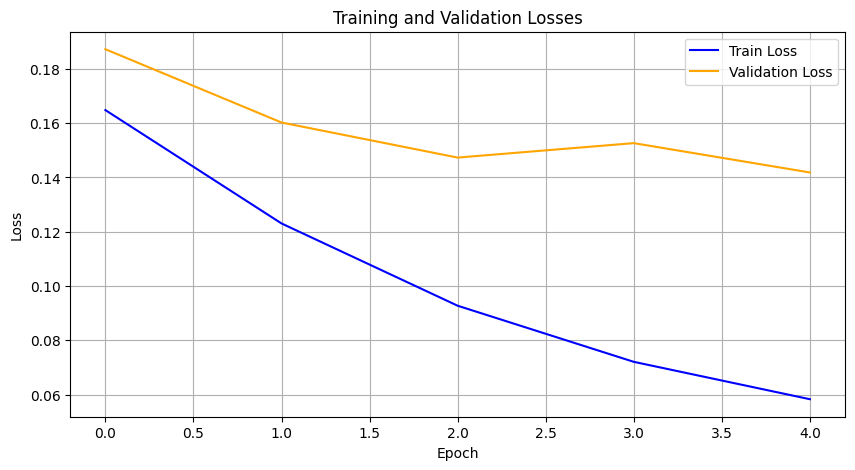

In [50]:

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

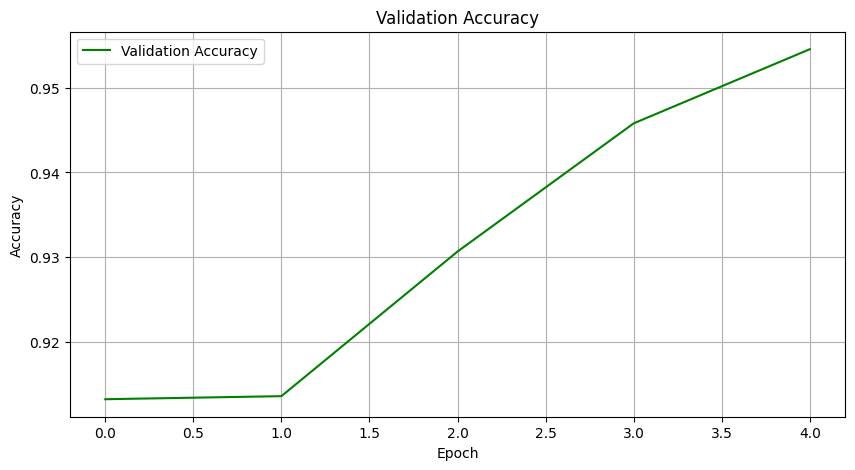

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Metrics:
   Epoch  Val Accuracy  Val Precision  Val Recall  Val F1 Score
0      1      0.956465       0.958633    0.956465      0.954336
1      2      0.963955       0.961958    0.963955      0.961117
2      3      0.966572       0.966253    0.966572      0.965443
3      4      0.968076       0.966380    0.968076      0.965669
4      5      0.968467       0.969111    0.968467      0.968107


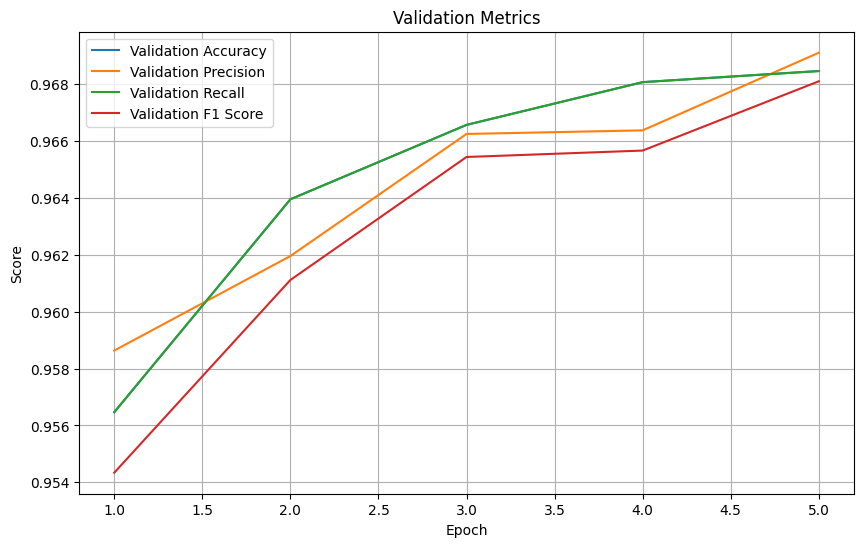

In [51]:


# Create a dictionary to hold the metrics
metrics_dict = {
    'Epoch': list(range(1, num_epochs + 1)),
    'Val Accuracy': val_accuracies,
    'Val Precision': val_precisions,
    'Val Recall': val_recalls,
    'Val F1 Score': val_f1_scores
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Display the DataFrame
print("Metrics:")
print(metrics_df)

# Plot the metrics
plt.figure(figsize=(10, 6))

plt.plot(metrics_df['Epoch'], metrics_df['Val Accuracy'], label='Validation Accuracy')
plt.plot(metrics_df['Epoch'], metrics_df['Val Precision'], label='Validation Precision')
plt.plot(metrics_df['Epoch'], metrics_df['Val Recall'], label='Validation Recall')
plt.plot(metrics_df['Epoch'], metrics_df['Val F1 Score'], label='Validation F1 Score')

plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Metrics')
plt.legend()
plt.grid(True)
plt.show()
